In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
import os


df = pd.read_csv('diabetes.csv' )

Objective 1.Data Cleaning & Preprocessing

In [3]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Display missing values count
print("Missing values:\n", df.isnull().sum())

Missing values:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


obj 2.Impute Missing Values using mean,median

In [ ]:

df = pd.read_csv('diabetes.csv' )
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())



using knn

In [11]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

obj 3.Exploratory Data Analysis (EDA)

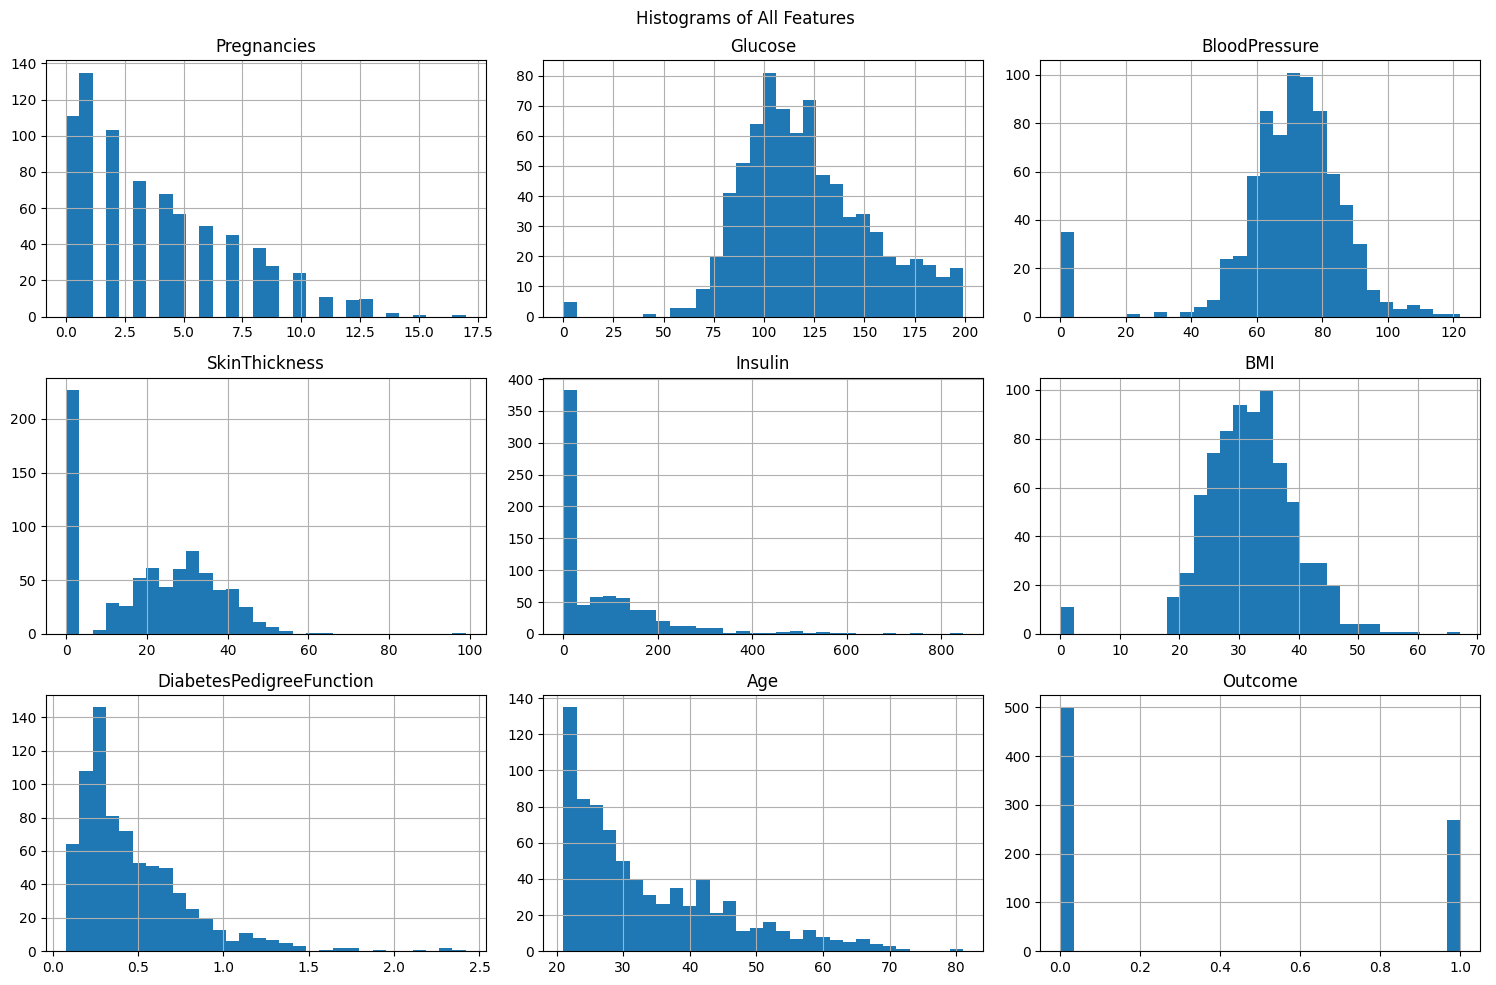

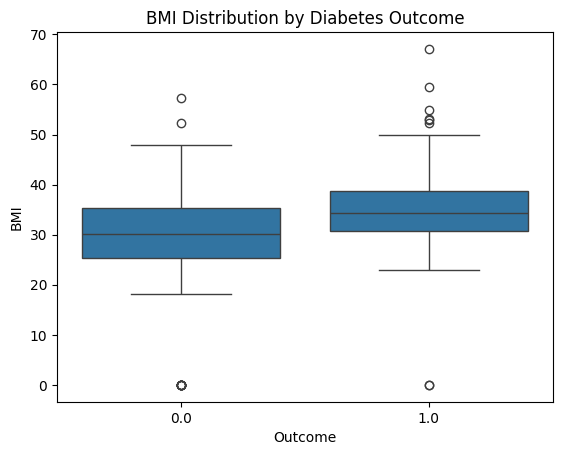

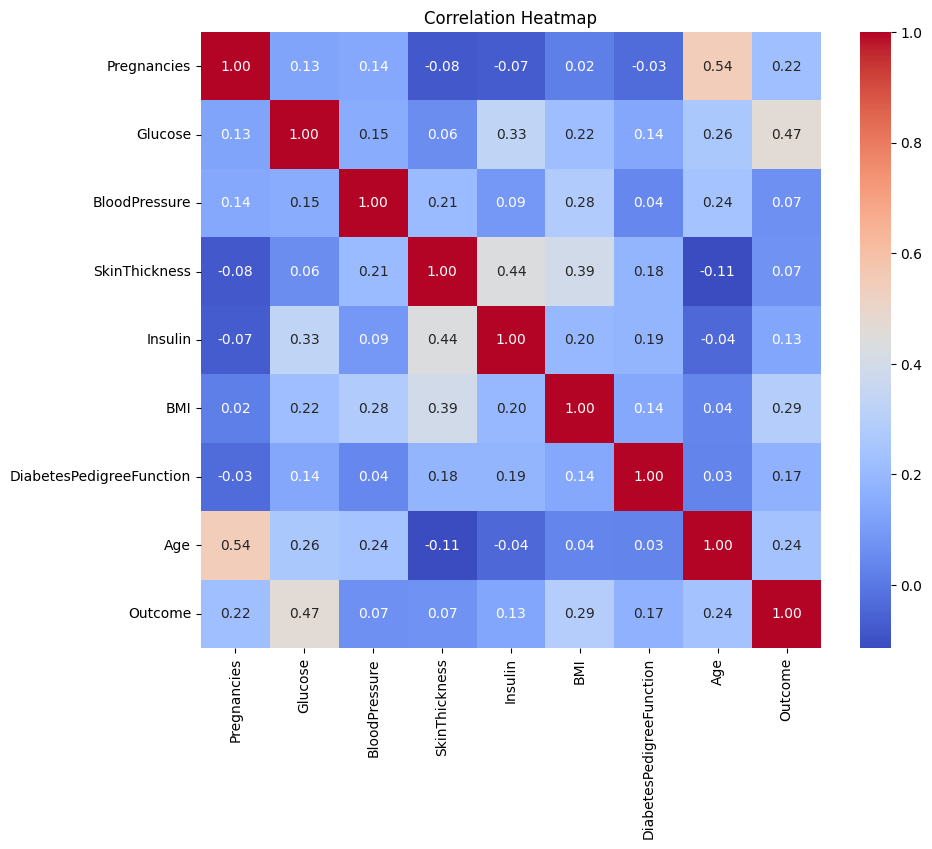

In [12]:

# Histogram
df_imputed.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of All Features")
plt.tight_layout()
plt.show()

# Box plot 
sns.boxplot(x='Outcome', y='BMI', data=df_imputed)
plt.title("BMI Distribution by Diabetes Outcome")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()



Obj 4. Outlier detection

In [13]:
z_scores = np.abs(stats.zscore(df_imputed))
df_no_outliers = df_imputed[(z_scores < 3).all(axis=1)]

print(f"\ndataset size: {df.shape[0]}")
print(f"After removing outliers: {df_no_outliers.shape[0]}")


dataset size: 768
After removing outliers: 688


5. Machine Learning Model Evaluation by comparison

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

X = df_no_outliers.drop('Outcome', axis=1)
y = df_no_outliers['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🔹 {name} Results:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))



🔹 SVM Results:
Accuracy : 0.7391304347826086
Precision: 0.7428571428571429
Recall   : 0.49056603773584906
F1 Score : 0.5909090909090909

🔹 Random Forest Results:
Accuracy : 0.7318840579710145
Precision: 0.75
Recall   : 0.4528301886792453
F1 Score : 0.5647058823529412

🔹 Naive Bayes Results:
Accuracy : 0.7101449275362319
Precision: 0.6511627906976745
Recall   : 0.5283018867924528
F1 Score : 0.5833333333333334

🔹 Decision Tree Results:
Accuracy : 0.7391304347826086
Precision: 0.717948717948718
Recall   : 0.5283018867924528
F1 Score : 0.6086956521739131


obj6.analyzed feature importance for diabetes prediction

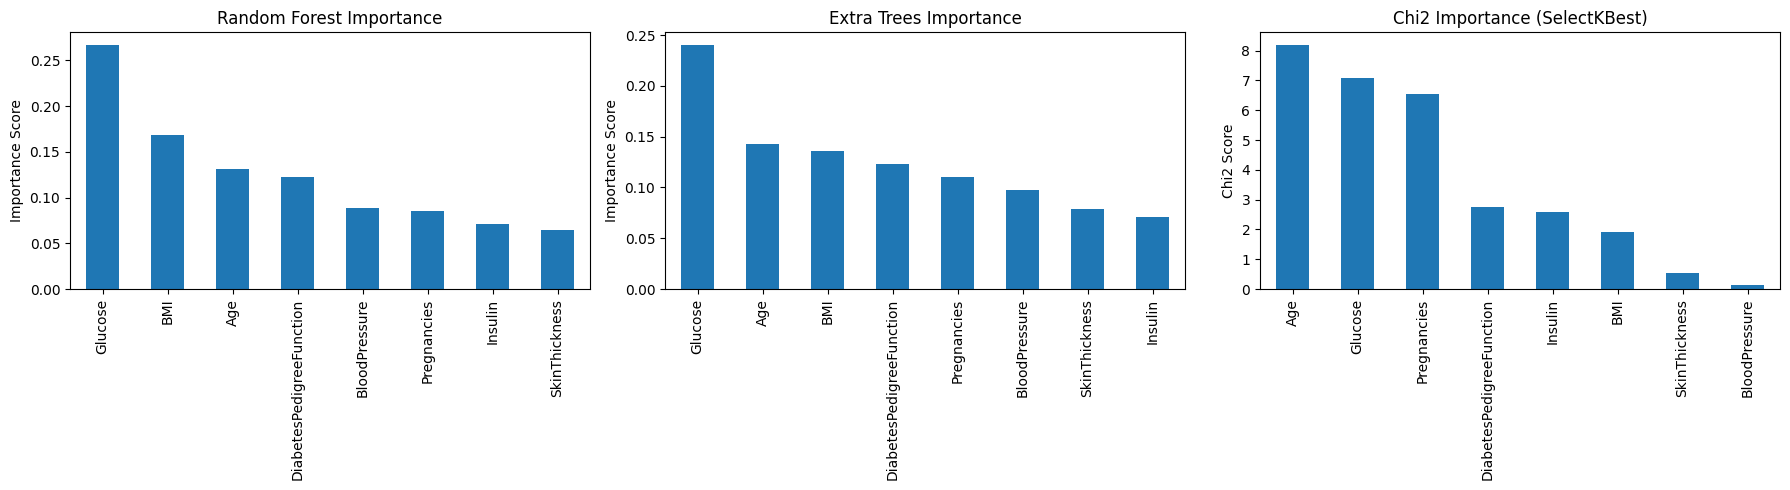

Top 3 Features by Random Forest: Glucose    0.267142
BMI        0.168769
Age        0.131567
dtype: float64
Top 3 Features by Extra Trees: Glucose    0.240687
Age        0.143071
BMI        0.135413
dtype: float64
Top 3 Features by Chi2: Age            8.205691
Glucose        7.094910
Pregnancies    6.559982
dtype: float64


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
importances_rf = importances_rf.sort_values(ascending=False)


etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(X, y)
importances_etc = pd.Series(etc.feature_importances_, index=X.columns)
importances_etc = importances_etc.sort_values(ascending=False)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_scaled, y)
importances_chi2 = pd.Series(selector.scores_, index=X.columns)
importances_chi2 = importances_chi2.sort_values(ascending=False)


plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
importances_rf.plot(kind='bar', title='Random Forest Importance')
plt.ylabel("Importance Score")

plt.subplot(1, 3, 2)
importances_etc.plot(kind='bar', title='Extra Trees Importance')
plt.ylabel("Importance Score")

plt.subplot(1, 3, 3)
importances_chi2.plot(kind='bar', title='Chi2 Importance (SelectKBest)')
plt.ylabel("Chi2 Score")

plt.tight_layout()
plt.show()

# Print top features for summary
print("Top 3 Features by Random Forest:", importances_rf.head(3))
print("Top 3 Features by Extra Trees:", importances_etc.head(3))
print("Top 3 Features by Chi2:", importances_chi2.head(3))


obj 7. Compare Model Training Time for Efficiency Analysis

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

training_times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time

print("Model Training Time: ")
for model_name, t in training_times.items():
    print(f"{model_name}: {t:.4f} seconds")


Model Training Time: 
Logistic Regression: 0.0037 seconds
K-Nearest Neighbors: 0.0014 seconds
Support Vector Machine: 0.0082 seconds
Decision Tree: 0.0038 seconds
Random Forest: 0.1307 seconds
